# Example 4: Influence of the neutron polarisation

Plot the spin asymmetry for differnt neutron polarisation for a simple Fe sphere magnetised along $W||z$ (see Example 1).

In [1]:
import mm2SANS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" create the Sample object (using settings from Example 1)"""
sample = mm2SANS.Sample(
    positions=[[0, 0, 0]],
    moments=[[0, 0, 1]],
    scattering_length_density=(8.024-0.001j),
    saturation_magnetisation=800e3,
    voxel_volumes= 4/3 * np.pi * 10e-9**3 ,
    periodicity=(50e-9, 50e-9, 50e-9),
    print_diagnostics=True,
    )

""" create a Detector object (using Settings from Example 2) """
print()
probe = mm2SANS.Probe(
                  sans_instrument='test'
                , neutron_wavelength=6e-10 # in m
                , detector_distance=15 # in m
                , qmap_disorder=0.35 # to avoid Fourier transform artefacts
               )
probe.Beamline.print_beamline_settings()

""" initialise Experiment object """
experiment = mm2SANS.Experiment( sample, probe, print_diagnostics=False )

Data bounding box size: (0.0, 0.0, 0.0) nm.
REMARK: Voxel volumes were not corrected.
1 positions with an average sphere diameter of 20.00 nm, and an average moment of 1.2e+05 mu_Bohr.

Neutron wavelength = 6.0 Angstrom, detector distance = 15 m
No neutron polarisation set.


C:\ProgramData\Anaconda3\lib\site-packages\mm2sans-0.1-py3.6.egg\mm2SANS\experiment.py:653: UserWarning: No contour levels were found within the data range.


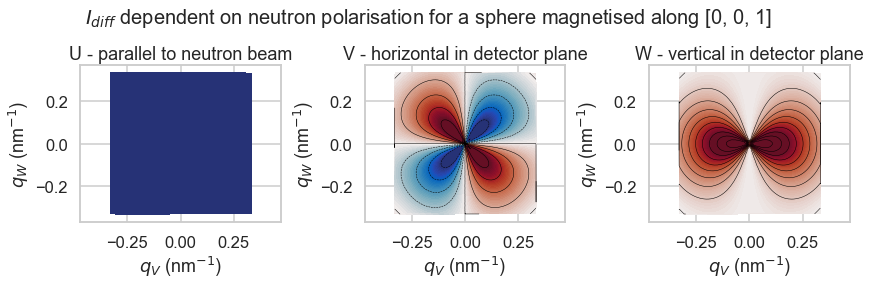

In [3]:
polarisation_list = [ # neutron polarisation, direction in beamline coordinate system, description
      [ [1, 0, 0], 'U - parallel to neutron beam']
    , [ [0, 1, 0], 'V - horizontal in detector plane']
    , [ [0, 0, 1], 'W - vertical in detector plane']
    ]

# initialise figure
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3, subplot_kw=dict(aspect='equal'))
fig.suptitle(
    '$\sigma_{{diff}}$ dependent on neutron polarisation for a sphere magnetised along [0, 0, 1]',
    fontsize = 20)

for i, polarisation in enumerate(polarisation_list):
       
    # set neutron polarisation and calculate scattering pattners
    polarisation_vector, explanation = polarisation
    experiment.Probe.neutron_polarisation_UVW = np.array( polarisation_vector )
    experiment.calc_scattering_pattern(uc_repetitions=(1,1,1), print_diagnostics=False)
    
    # plot data
    experiment.plot_property('I_dif', ax = axes[i], title = explanation)

plt.tight_layout()